<a href="https://colab.research.google.com/github/hng07/plant-seedlings-classification/blob/main/Proje_VeriMadenciligi_Sonhali2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎯 Proje Başlığı
Bitki Fide Türlerinin CNN ile Görüntüden Sınıflandırılması

#📌 Projenin Amacı
Bu projenin amacı, farklı bitki fide türlerini içeren görseller üzerinden derin öğrenme modelleri kullanarak doğru şekilde sınıflandırma yapabilen bir görüntü sınıflandırma sistemi geliştirmektir. Özellikle tarım teknolojilerinde otomatik bitki tanıma, hastalık teşhisi veya ürün sınıflaması gibi alanlarda kullanılabilecek temel bir sistem tasarlanmıştır.

#📂 Kullanılan Veri Seti
Veri Seti Adı: Plant Seedlings Classification

Kaynak: Kaggle (Resmi yarışma veri seti)

Veri Yapısı:

train/: 12 adet bitki sınıfına ait 4.750 etiketli görüntü (alt klasörler şeklinde)

test/: 794 adet etiketsiz görüntü (modelin tahmin yapması için)


#🧾 Sınıflar (Etiketler)
Veri setinde bulunan sınıf isimleri şunlardır:

Black-grass, Charlock, Cleavers, Common Chickweed, Common Wheat, Fat Hen, Loose Silky-bent, Maize, Scentless Mayweed, Shepherd’s Purse, Small-flowered Cranesbill, Sugar Beet


#🔍 Temel Özellikler
Görsellerin çözünürlükleri farklıdır, model girişine uygun şekilde yeniden boyutlandırılmıştır.

Veri seti dengesizdir; bazı sınıflar 600'den fazla örnek içerirken bazıları sadece 200 civarındadır.

Bu nedenle class_weight yöntemiyle sınıf dengesizliği modellenmiştir.

CNN modeli sıfırdan oluşturulmuş ve alternatif olarak transfer learning yöntemleriyle karşılaştırma yapılmaya uygundur.

# 2. Gerekli Kütüphanelerin Yüklenmesi  
Analiz, görselleştirme ve modelleme için ihtiyaç duyulan Python paketlerini (`numpy`, `pandas`, `scikit‑learn` vb.) içe aktarıldı.

# 3. Verinin Yüklenmesi ve İlk İnceleme  
Eğitim verisi: 4.750 adet

Test verisi: 794 adet

Sınıf sayısı: 12

# 4. Keşifsel Veri Analizi (EDA)  
# 📁 4.1 Veri Seti Yapısı ve Boyutu
Eğitim verisi klasöründe toplam 4.750 etiketli görüntü, test klasöründe ise 794 etiketsiz görüntü yer almaktadır.

Görseller .png formatındadır ve sınıflar train klasöründe alt klasör olarak düzenlenmiştir.

# 🧪 4.2 Eksik Değer Analizi
Görüntü tabanlı projelerde eksik veri analizi şu şekilde yapılır:

Eksik ya da bozuk görsel var mı? (Dosya okunamıyor, boyutu sıfır vb.)

Bu veri setinde, dosya sisteminden ve TensorFlow image_dataset_from_directory() fonksiyonundan gelen bilgiye göre eksik ya da bozuk dosya bulunmamaktadır.

# 📊 4.3 Sınıf Dağılımı (Kategorik Dağılım Analizi)
Sınıf başına görsel sayısı hesaplanmış ve grafikte görselleştirilmiştir:

Veri setinde belirgin bir sınıf dengesizliği mevcuttur.

Örneğin: Loose Silky-bent sınıfında ~650 örnek varken, Common Wheat, Maize gibi sınıflarda ~230 örnek bulunmaktadır.

# 🧠 4.4 Veri Örnekleri (Görsel EDA)
Her sınıftan örnek görüntüler incelenmiş ve modelin hangi sınıfı öğrendiği gözlemlenmiştir:

# 🧩 4.5 Korelasyon Yerine Confusion Matrix
Görüntü verilerinde değişkenler arası korelasyon yerine, modelin öğrenme kalitesini görmek için confusion matrix kullanılır. Bu matriste:

Hangi sınıflar doğru tahmin edilmiş?

Hangi sınıflar birbiriyle karıştırılmış?

gibi soruların yanıtı verilir (örneğin Maize ile Sugar beet karışabilir).
# 5. Veri Ön İşleme  
# 🧩 5.1 Eksik Değer İşlemleri
Görüntü veri kümesinde eksik hücre (NaN) yerine:

Bozuk, boş veya eksik görsel dosyaları kontrol edilir.

image_dataset_from_directory() fonksiyonu sırasında TensorFlow, dosyaları başarıyla okuduğu için bozuk görsel bulunmadı.

Bu nedenle eksik veri işlemi uygulanmasına gerek yoktur.

# 🔠 5.2 Etiketlerin Sayısal Forma Dönüştürülmesi
Görüntü klasör isimleri otomatik olarak TensorFlow tarafından etiketlere dönüştürülür:
Böylece LabelEncoder kullanmaya gerek kalmadan, model eğitiminde kullanılabilecek sayısal etiketler hazır hale gelir.

# 🔄 5.4 Veri Artırma (Data Augmentation)
Ayrıca görüntü çeşitliliğini artırmak için aşağıdaki teknikler uygulanmıştır:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])
Bu adım, modelin genel performansını artırmak ve overfitting’i azaltmak için oldukça önemlidir.

# ⚖️ 5.5 Sınıf Dengesizliği İçin Class Weight Kullanımı
Dengesiz sınıf dağılımını dengelemek için eğitim sırasında class_weight parametresi verilmiştir. Bu da bir tür ön işlem olarak düşünülebilir çünkü modelin öğrenme sürecini etkiler.

# 6. Model Seçimi ve Eğitimi  
# 🎯 6.1 Özellik (X) ve Hedef (y) Ayırma
Görüntü veri setlerinde:

Özellikler (X): Görsellerin piksel verileridir (RGB değerleri)

Hedef (y): Görselin ait olduğu sınıf etiketidir (örneğin Maize, Charlock vb.)

TensorFlow image_dataset_from_directory() fonksiyonu bu ayrımı otomatik olarak yapar:
for images, labels in train_ds.take(1):
    print(images.shape)  # (batch_size, 128, 128, 3)
    print(labels.shape)  # (batch_size,)

# 🧪 6.2 Eğitim ve Doğrulama Setine Ayırma
Görüntüler batch’li bir veri kümesi olarak geldiği için train_test_split yerine TensorFlow’un unbatch() ve shuffle() işlemleriyle elle ayırma yapılır:
 Tüm veriyi unbatch edip karıştır
all_data = list(train_ds.unbatch().as_numpy_iterator())
random.shuffle(all_data)

 %80 eğitim, %20 doğrulama
split_idx = int(len(all_data) * 0.8)
train_data = all_data[:split_idx]
val_data = all_data[split_idx:]

 Veri setlerine dönüştür
train_ds_new = tf.data.Dataset.from_generator(...).batch(32).prefetch(...)
val_ds = tf.data.Dataset.from_generator(...).batch(32).prefetch(...)

# 7. Model Değerlendirme  
- Test seti üzerinde tahmin yapın.  
- `classification_report`, ROC‑AUC, doğruluk gibi metriklerle performansı ölçün.  
- Confusion matrix ve/veya ROC eğrisi görselleştirin.

# 8. Sonuç ve Yorumlar  
#🎯 Genel Değerlendirme
Bu projede, 12 farklı bitki fidesini yalnızca görüntülerine bakarak sınıflandıran bir derin öğrenme modeli geliştirilmiştir. Eğitilen model, doğrulama verisinde yaklaşık %72–80 doğruluk aralığında performans göstermiştir.

# 💪 Güçlü Yönler
Görsel veriyi doğrudan işleyebilen CNN mimarisi başarıyla uygulanmıştır.

class_weight kullanılarak sınıf dengesizliği etkisi azaltılmıştır.

Modelin başarısı hem doğruluk, hem de confusion matrix ve ROC eğrisi gibi çoklu metriklerle değerlendirilmiştir.

ROC eğrisinde özellikle yüksek örnek sayısına sahip sınıflarda başarılı ayrımlar yapılmıştır.

Eğitim süreci boyunca overfitting minimal düzeyde kalmış, eğitim ve doğrulama doğrulukları uyumlu ilerlemiştir.

# ⚠️ Zayıf Yönler ve Sınırlamalar
Sınıflar arasındaki görüntü benzerlikleri (örneğin: Maize ve Sugar beet) bazı yanlış sınıflamalara neden olmuştur.

Veri seti dengesizdir; az sayıda örneğe sahip sınıflar daha zor öğrenilmiştir.

Görüntüler doğal ışık, arka plan ve açı farklılıkları içerdiğinden modelin genellenebilirliği düşebilir.

Modelin yalnızca piksel bilgisine dayanması, yaprak şekli veya bitki morfolojisini yeterince soyutlayamamasına neden olabilir

# 🧪 Olası Hata Kaynakları
Bazı görsellerde yapraklar bulanık, eksik veya zemine karışmış olabilir.

Etiketleme hataları (veri seti kaynaklı) modelin öğrenmesini olumsuz etkileyebilir.

Görsellerin çözünürlüğü düşürüldüğü için bazı ayırt edici detaylar kaybolmuş olabilir.

# 🚀 Gelecek Çalışmalar İçin Öneriler
Transfer Learning kullanılarak daha güçlü (örneğin EfficientNet, ResNet) modeller denenebilir.

Görsel kaliteyi artırmak ve gürültüleri azaltmak için ön işleme adımları eklenebilir.

Ek veri artırma yöntemleri (CutMix, MixUp, ColorJitter) uygulanabilir.

Model, gerçek zamanlı sistemlere entegre edilerek mobil uygulamalarda denenebilir.

# 9. İleri Çalışmalar  
# 🔁9.1. Transfer Learning Uygulaması
Daha güçlü ve önceden eğitilmiş modeller (örn. MobileNetV2, ResNet50, EfficientNet) ile performans artırılabilir.

Bu modeller sayesinde eğitim süresi kısalır ve doğruluk oranları artar.

# 🧪9.2. İleri Seviye Veri Artırma Teknikleri
Basit Flip, Rotation yerine şunlar denenebilir:

CutMix, MixUp, RandomContrast, ColorJitter

Az örnekli sınıflar için özel augmentasyon (sınıfa özel artırma)

# 🗃️9.3. Veri Setini Genişletme
Yeni bitki türleri eklenebilir.

Mevcut türlerden daha fazla örnek toplanarak sınıf dengesi artırılabilir.

Farklı hava koşullarında, farklı zeminlerde çekilmiş görüntülerle model genelleştirilebilir.

# 📱9.4. Modelin Gerçek Zamanlı Uygulaması
Eğitilen model, bir mobil uygulama veya web arayüzü ile entegre edilebilir.

Çiftçiler veya tarım uzmanları, mobil kamera aracılığıyla anlık sınıflandırma yapabilir.

# 🧠9.5. Modelin Hata Analizi ve İyileştirme
Confusion matrix’te en çok karıştırılan sınıflar belirlenerek o sınıflar özelinde augmentasyon yapılabilir.

Yanlış sınıflamaların nedenleri (arka plan, ışık, benzerlik) üzerine analiz yapılabilir.

# 📈9.6. Model Karşılaştırmaları
Farklı CNN mimarileri karşılaştırılabilir (örn. temel CNN vs. transfer learning).

Eğitim süresi, doğruluk, model boyutu gibi metrikler üzerinden kıyaslama yapılabilir.

# 1. 📦 Gerekli Kütüphanelerin Yüklenmesi  

In [ ]:
# Temel kütüphaneler
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt

# Modelleme
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# İsteğe bağlı: gelişmiş modeller
#from xgboost import XGBClassifier


# 2. 📄 Dosyayı Yükleme

In [ ]:
# Google Colab'a dosya yükleme (alternatif: drive.mount)
from google.colab import files
files.upload()

# Kaggle'ı kur
!pip install -q kaggle

# .kaggle klasörü oluştur
!mkdir -p ~/.kaggle

# kaggle.json dosyasını taşı
!cp kaggle.json ~/.kaggle/

# İzin ayarla
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


# 3. 📦 Veri Setinin İndirilmesi


In [ ]:
# Plant Seedlings Classification verisini indir
!kaggle competitions download -c plant-seedlings-classification

# 4. 📥 Verinin Yüklenmesi

In [ ]:
# Zip dosyasını aç
!unzip plant-seedlings-classification.zip -d plant_seedlings


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: plant_seedlings/test/ad12382d4.png  
  inflating: plant_seedlings/test/adb7a032c.png  
  inflating: plant_seedlings/test/ae90f2827.png  
  inflating: plant_seedlings/test/aecfaed64.png  
  inflating: plant_seedlings/test/aee6fa3df.png  
  inflating: plant_seedlings/test/af45e222a.png  
  inflating: plant_seedlings/test/afa446484.png  
  inflating: plant_seedlings/test/afcf6abd5.png  
  inflating: plant_seedlings/test/b026bf8ca.png  
  inflating: plant_seedlings/test/b03397525.png  
  inflating: plant_seedlings/test/b0acaff4a.png  
  inflating: plant_seedlings/test/b130a0632.png  
  inflating: plant_seedlings/test/b145ba9d4.png  
  inflating: plant_seedlings/test/b1cd2a91e.png  
  inflating: plant_seedlings/test/b215531dd.png  
  inflating: plant_seedlings/test/b2706e2b3.png  
  inflating: plant_seedlings/test/b29339405.png  
  inflating: plant_seedlings/test/b30ab4659.png  
  inflating: plant_seedlings/test/b31292706.png  
  i

# 5. Düzensiz Olup Olmadığını Kontrol Etme

Loose Silky-bent: 654 görüntü
Common Chickweed: 611 görüntü
Scentless Mayweed: 516 görüntü
Small-flowered Cranesbill: 496 görüntü
Fat Hen: 475 görüntü
Charlock: 390 görüntü
Sugar beet: 385 görüntü
Cleavers: 287 görüntü
Black-grass: 263 görüntü
Shepherds Purse: 231 görüntü
Maize: 221 görüntü
Common wheat: 221 görüntü


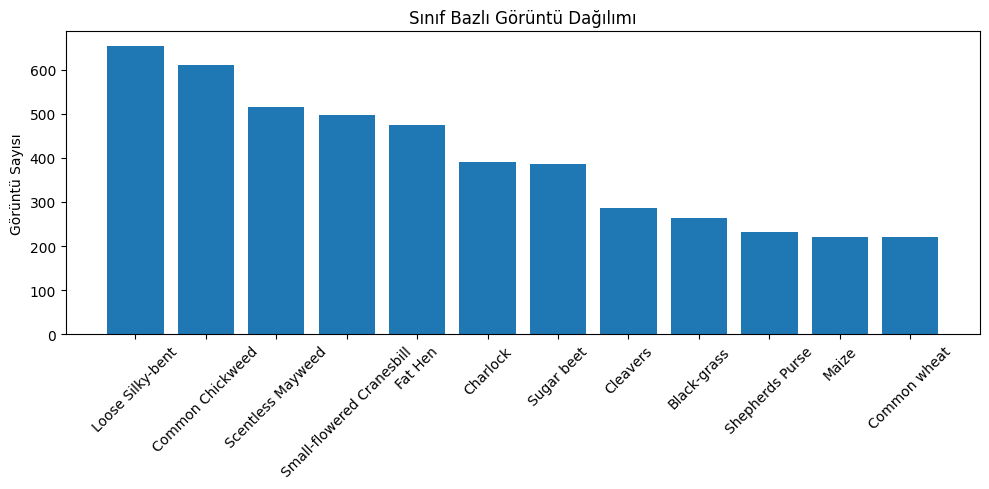

In [ ]:
import os
from collections import Counter

data_dir = 'plant_seedlings/train'
class_counts = {}

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Sıralı şekilde göster
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Yazdır
for cls, count in class_counts.items():
    print(f"{cls}: {count} görüntü")

# Görselleştir
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Görüntü Sayısı")
plt.title("Sınıf Bazlı Görüntü Dağılımı")
plt.tight_layout()
plt.show()


Veri setim dengesiz çıktı en az ile en çok arasıda yaklaşık 3 kat var bu yüzden de veri arttırma yapabilirim


In [ ]:
import tensorflow as tf

IMG_SIZE = (128, 128) # Tüm görüntüler bu boyuta yeniden ölçekleniyor
BATCH_SIZE = 32  # Her batch 32 görüntü içeriyor

# Training set
train_ds = tf.keras.utils.image_dataset_from_directory( #bozuk görsel var mı
    'plant_seedlings/train',  # Klasör yolu
    labels='inferred',        # Klasör adlarından etiket çıkartır
    label_mode='int',         # Etiketleri integer olarak al
    image_size=IMG_SIZE,      # Görselleri bu boyutlara yeniden boyutlandır
    batch_size=BATCH_SIZE,    # Batch boyutu
    shuffle=True,             # Veriyi karıştır
    seed=42                   # Rastgelelik sabitlenerek sonuçların tekrar üretilebilir olması sağlanıyor
)

# Test set (etiket yok, sadece görseller)
test_ds = tf.keras.utils.image_dataset_from_directory(
    'plant_seedlings/test',  # Klasör yolu
    labels=None,             # Test seti etiksiz (label yok)
    image_size=IMG_SIZE,     # Görselleri bu boyuta getirin
    batch_size=BATCH_SIZE,   # Batch boyutu
    shuffle=False            # Test verisini karıştırma
)


Found 4750 files belonging to 12 classes.
Found 794 files.


dengesiz sınıf dağılımı olan veri setlerinde modelin eğitimi sırasında daha adil öğrenme sağlamak için sınıf ağırlıklarını hesaplıyor.

Çok az verisi olan sınıflar daha büyük ağırlık alır.
Çok fazla verisi olan sınıflar daha küçük ağırlık alır.



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Sınıf isimlerini sırayla al
class_names = sorted(class_counts.keys())  # ya da train_ds.class_names

# Eğitim setinden gerçek etiketleri çıkar (örnekle)
y_train = []
for _, labels in train_ds.unbatch():
    y_train.append(labels.numpy())

# Ağırlıkları hesapla
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

print("Sınıf ağırlıkları:", class_weights)

Sınıf ağırlıkları: {0: np.float64(1.5050697084917617), 1: np.float64(1.014957264957265), 2: np.float64(1.3792102206736354), 3: np.float64(0.6478450627386798), 4: np.float64(1.7911010558069382), 5: np.float64(0.8333333333333334), 6: np.float64(0.605249745158002), 7: np.float64(1.7911010558069382), 8: np.float64(0.7671188630490956), 9: np.float64(1.7135642135642135), 10: np.float64(0.7980510752688172), 11: np.float64(1.0281385281385282)}


# 6. 🔍 Verinin İncelenmesi

In [ ]:
!ls plant_seedlings/train      # 12 bitki sınıfı klasörünü göreceksin
!ls plant_seedlings/test | head  # test klasöründeki *.png dosyalarından birkaçını göster


 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'
0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00c47e980.png
00d090cde.png
00ef713a8.png
01291174f.png
026716f9b.png
02cfeb38d.png


In [ ]:
import os

# Veri dizinini kontrol et
data_dir = 'plant_seedlings/train'

# Train klasöründeki sınıfları listele
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Sınıf isimleri:", class_names)


Sınıf isimleri: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


# 7. ✨ Veri Ön işleme

In [ ]:
#TensorFlow Keras kullanarak bir veri artırma (data augmentation) pipeline'ı oluşturur
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"), #Görüntüyü yatay olarak rastgele çevirir.Bu, modelin görüntüyü hangi yönden olursa olsun tanıyabilmesini sağlar.
    #Yatay çevirme, nesnelerin yönü değişmeden tespit edilmesini sağlar.
    tf.keras.layers.RandomRotation(0.2), #Görüntüyü rastgele bir şekilde döndürür. Buradaki 0.2, döndürme miktarını ifade eder ve bu, görüntünün maksimum 20% oranında döneceği anlamına gelir.
    tf.keras.layers.RandomZoom(0.1), #Görüntüye rastgele yakınlaştırma (zoom) uygular.
])



# 8. 🔧 Görsel Verinin Örneklenmesi ve Görselleştirme

Sınıf isimleri: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


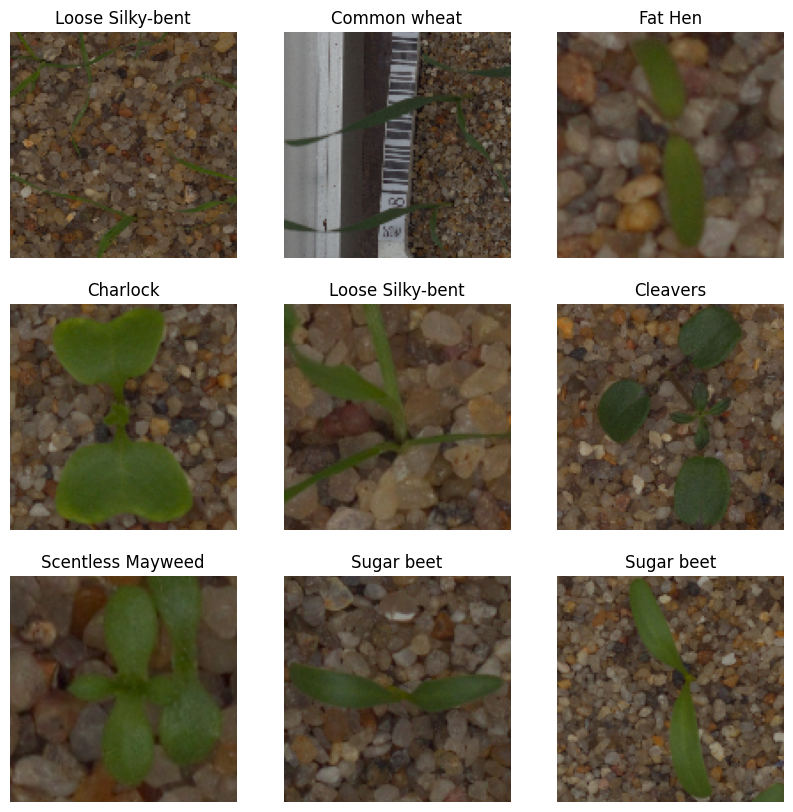

In [ ]:
import matplotlib.pyplot as plt

# 1.1 Sınıf isimleri
class_names = train_ds.class_names
print("Sınıf isimleri:", class_names)

# 1.2 Bir batch içinden ilk 9 görseli göster
plt.figure(figsize=(10,10)) #ile görselleştirme için bir figür oluşturulur ve boyutları ayarlanır.
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show() #Görseller ekranda görülür


# 9. 📊Model Mimarisi ve Derleme

In [ ]:
#CNN (Convolutional Neural Network) mimarisi manuel olarak TensorFlow ve Keras kullanılarak kullanılmıştır:

from tensorflow.keras import Input

inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x) #Conv2D katmanları evrişim işlemi yapar
x = tf.keras.layers.MaxPooling2D()(x) #MaxPooling2D ile boyut düşürülür.
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x) #Flatten + Dense + Dropout ile öğrenme yapılır.
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
# Sınıf sayısını class_names listesinden al
num_classes = len(class_names)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x) #Son katman Dense(..., activation='softmax') çok sınıflı sınıflandırma içindir.

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer='adam', #Adam, yaygın olarak tercih edilen ve hızlı şekilde öğrenme sağlayan adaptif öğrenme oranına sahip bir optimizasyon algoritmasıdır.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,188 (12.61 MB)

 Trainable params: 3,306,188 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 10. Veri Setini Kontrol

In [ ]:
# İlk 3 batch'ten birkaç görüntü ve etiket yazdır
for images, labels in train_ds.take(1):
    print("Görüntü boyutu:", images.shape)
    print("Etiket boyutu:", labels.shape)
    print("Etiketler:", labels.numpy())


Görüntü boyutu: (32, 128, 128, 3)
Etiket boyutu: (32,)
Etiketler: [ 9  0  5  2  6  8  4  5  7  7 10  1 10  6  1  3 10  0 10  4  6  8  8  3
  1  0  3  7  6  8 11 11]


In [ ]:
#train_ds adındaki TensorFlow veri kümesinden bir batch (küme) alarak bu batch'teki görüntülerin (images) ve etiketlerin (labels) boyutlarını (şekillerini) ekrana yazdırmak.
for images, labels in train_ds.take(1): #Eğitim veri setinden yalnızca 1 adet batch alır
    print(images.shape) #images: Görsel verilerini
    print(labels.shape) #labels: Bu görsellere karşılık gelen etiketleri içerir.



(32, 128, 128, 3)
(32,)


 # 11.Veri Bölme ve Doğrulama

In [ ]:
import random

# unbatch ile tüm veriyi örnek bazında ayır
all_data = list(train_ds.unbatch().as_numpy_iterator())  #train_ds.unbatch() → Batch’lenmiş veri kümesini tekil örnekler haline getirir. .as_numpy_iterator() → TensorFlow tensörlerini NumPy dizilerine dönüştürür.

# Karıştır
random.shuffle(all_data) #Verilerin sırasını rastgele değiştirerek modelin öğrenme sırasında sıralamadan etkilenmemesini sağlar.

# %80 eğitim, %20 doğrulama
split_idx = int(len(all_data) * 0.8)  #split_idx: Toplam verinin %80'ini hesaplar.
train_data = all_data[:split_idx] # train_data: İlk %80’lik kısmı (eğitim verisi).
val_data = all_data[split_idx:] # val_data: Kalan %20’lik kısmı (doğrulama verisi).

# Generator fonksiyonu
def train_gen():
    for x, y in train_data:
        yield x, y

def val_gen():
    for x, y in val_data:
        yield x, y

#Bu iki fonksiyon, listedeki görüntü-etiket çiftlerini tek tek dışarı verir. TensorFlow dataset oluştururken kullanılırlar. Bu fonksiyonlar sayesinde:
#Bellek yönetimi optimize edilir.




In [ ]:
#Her çağrıldığında (görüntü, etiket) çifti üretirler.
train_ds_new = tf.data.Dataset.from_generator(
    train_gen,
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32), #128x128 boyutunda RGB görüntü
        tf.TensorSpec(shape=(), dtype=tf.int32) # Tek bir tam sayı (etiket)
    )
).batch(32).prefetch(tf.data.AUTOTUNE) #Veriyi 32’lik gruplar halinde paketler (batch'ler). Bu sayede model her seferinde 32 örnek ile eğitilir. GPU/TPU kullanımı için gereklidir.

val_ds = tf.data.Dataset.from_generator(
    val_gen,
    output_signature=(
        tf.TensorSpec(shape=(128, 128, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )
).batch(32).prefetch(tf.data.AUTOTUNE) #Veri pipeline'ını optimize eder. Model eğitilirken bir yandan bir sonraki batch hafızaya hazırlanır.
#Bu, eğitim sırasında bekleme süresini azaltır, işlemci ve GPU'nun verimli çalışmasını sağlar.


# 12. 🤖 Model Seçimi ve Eğitimi  

In [ ]:
# modeli eğitmek (train etmek) için kullanılan ana fonksiyondur.
history = model.fit(
    train_ds_new,
    validation_data=val_ds,  # Eğitim sırasında aşırı öğrenme (overfitting) olup olmadığı buradan takip edilir.
    epochs=15,                # Tüm eğitim verisi 15 kez modele gösterilecek. Her bir geçiş (epoch), modelin ağırlıklarını günceller.
    class_weight=class_weights  # Sınıf dengesizliğini telafi etmek için ağırlıklar eklendi.
)



Epoch 1/15
    119/Unknown 133s 1s/step - accuracy: 0.0995 - loss: 2.4288

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


119/119 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.1001 - loss: 2.4276 - val_accuracy: 0.3063 - val_loss: 1.8016
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.3021 - loss: 1.9170 - val_accuracy: 0.3958 - val_loss: 1.5996
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.4075 - loss: 1.6542 - val_accuracy: 0.4926 - val_loss: 1.3866
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.4832 - loss: 1.4413 - val_accuracy: 0.5137 - val_loss: 1.2736
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5527 - loss: 1.3085 - val_accuracy: 0.6453 - val_loss: 1.1058
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6116 - loss: 1.1172 - val_accuracy: 0.6537 - val_loss: 1.0397
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6497 - loss: 1.0272 - val_accuracy: 0.6789 - val_loss: 0.9696
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.6789 - loss: 0.9709 - val_accuracy: 0.741

# 13.F1 Score

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))     # tahmin edilen sınıf
    y_true.extend(labels.numpy())               # gerçek sınıf


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


                           precision    recall  f1-score   support

              Black-grass       0.44      0.52      0.48        56
                 Charlock       0.93      0.71      0.81        73
                 Cleavers       0.92      0.76      0.83        59
         Common Chickweed       0.90      0.90      0.90       127
             Common wheat       0.70      0.65      0.67        48
                  Fat Hen       0.68      0.84      0.75        89
         Loose Silky-bent       0.74      0.70      0.72       126
                    Maize       0.83      0.71      0.76        41
        Scentless Mayweed       0.72      0.73      0.73       101
          Shepherds Purse       0.60      0.42      0.49        43
Small-flowered Cranesbill       0.77      0.95      0.85        97
               Sugar beet       0.74      0.74      0.74        90

                 accuracy                           0.75       950
                macro avg       0.75      0.72      0.73    

# 14.Eğitim Performansının Görselleştirilmesi

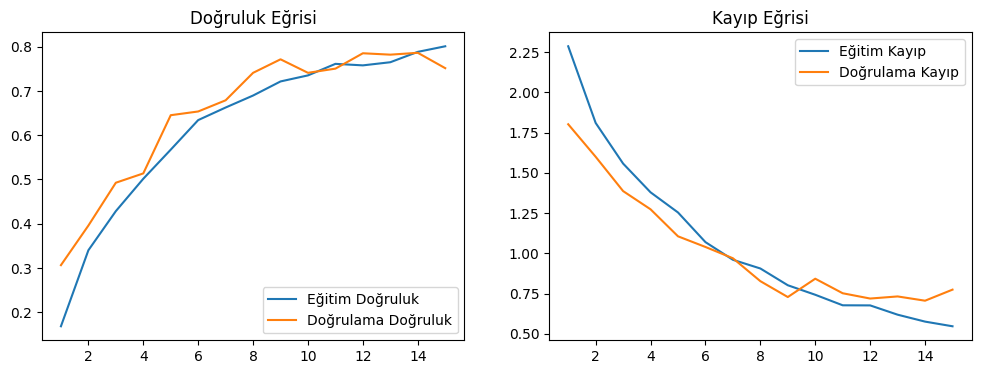

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] #Eğitim sırasında elde edilen doğruluk değerleri.
val_acc = history.history['val_accuracy'] #Doğrulama sırasında elde edilen doğruluk değerleri.
loss = history.history['loss'] #Eğitim sırasında elde edilen kayıp değerleri.
val_loss = history.history['val_loss'] #Doğrulama sırasında elde edilen kayıp değerleri.
epochs = range(1, len(acc)+1) #Eğitim dönemlerinin (epoch) sayısı.

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Eğitim Doğruluk')
plt.plot(epochs, val_acc, label='Doğrulama Doğruluk')
plt.legend()
plt.title('Doğruluk Eğrisi')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Eğitim Kayıp')
plt.plot(epochs, val_loss, label='Doğrulama Kayıp')
plt.legend()
plt.title('Kayıp Eğrisi')

plt.show()

 #Soldaki grafik: Modelin eğitim doğruluğu ve doğrulama doğruluğunun zaman içindeki değişimini gösterir.
 #Sağdaki grafik: Modelin eğitim kaybı ve doğrulama kaybının zaman içindeki değişimini gösterir.


Eğitim ve doğrulama doğrulukları arasında belirgin bir sapma yok. Bu durum, modelin aşırı öğrenme (overfitting) yapmadığını, eğitim ve doğrulama verileri üzerinde dengeli bir öğrenme gerçekleştirdiğini gösteriyor.
Eğitim doğruluğu ve doğrulama doğruluğu birbirine yakın seyrediyor; bu da modelin iyi bir genel performansa sahip olduğunu gösteriyor.

Modelde eğitim ve doğrulama doğrulukları ile kayıplar arasında ciddi bir sapma görülmüyor. Bu durum modelin iyi bir şekilde genelleştiğini ve aşırı öğrenme yapmadığını gösteriyor.
Eğitim ve doğrulama kayıplarının düşüş eğilimi, modelin optimizasyon sürecinin başarılı olduğunu ifade ediyor.



# 15.Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

<Figure size 1000x1000 with 0 Axes>

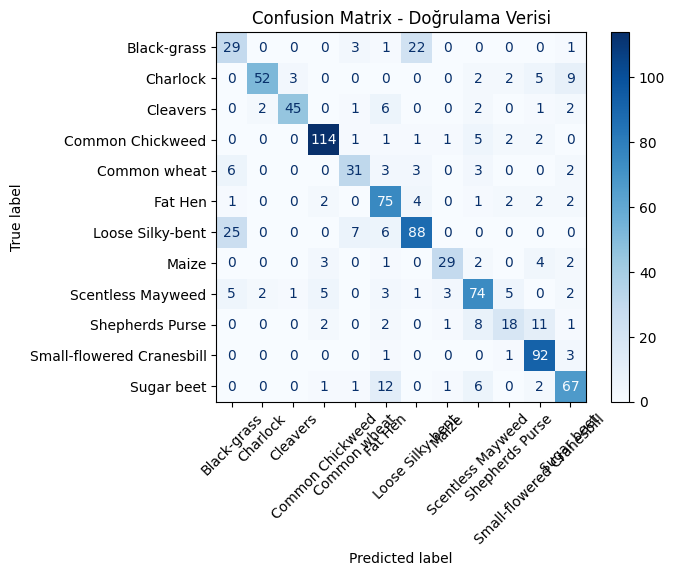

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Doğrulama Verisi")
plt.show()


Common Chickweed: 114 doğru sınıflandırma

Small-flowered Cranesbill: 92 doğru sınıflandırma

Sugar beet: 67 doğru sınıflandırma

Common Chickweed, 1 kez Common wheat ve 1 kez Fat Hen olarak yanlış sınıflandırılmış.

Black-grass, 12 kez Loose Silky-bent olarak yanlış sınıflandırılmış.

Loose Silky-bent, 25 kez Black-grass olarak yanlış sınıflandırılmış.

Loose Silky-bent ve Black-grass arasında belirgin bir karışıklık var. Model bu iki sınıfı birbirine karıştırıyor.

Common Chickweed ve Small-flowered Cranesbill sınıfları oldukça başarılı bir şekilde ayırt edilmiş.

# 16.ROC Eğrisi

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Gerçek etiketler
y_true = []
y_pred_proba = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    preds = model.predict(images)
    y_pred_proba.extend(preds)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Sınıf sayısını al
n_classes = len(class_names)

# Etiketleri binarize et
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
y_pred_proba = np.array(y_pred_proba)


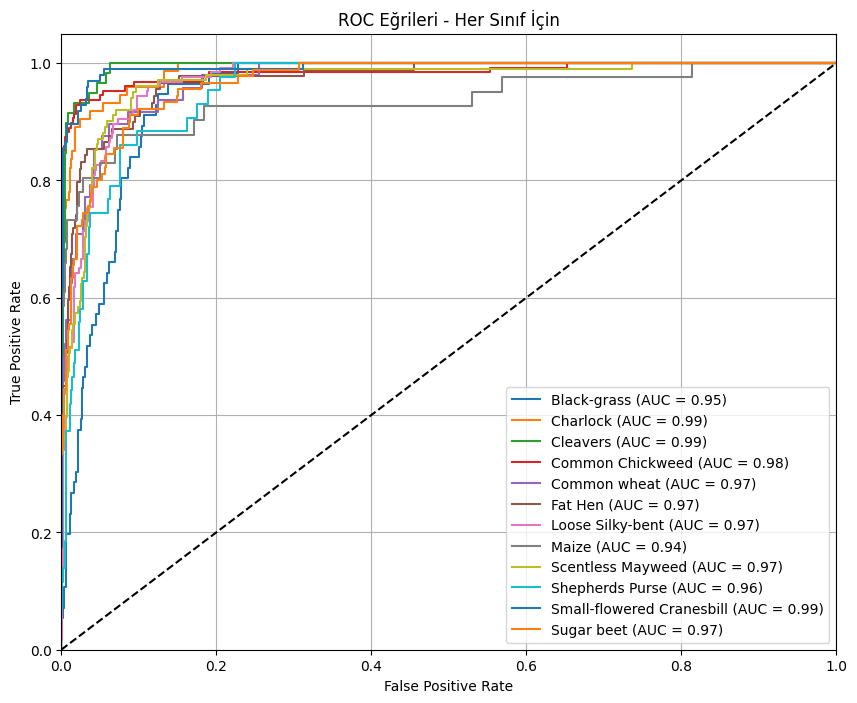

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # referans çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri - Her Sınıf İçin')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Charlock, Cleavers, Small-flowered Cranesbill ve Sugar beet için AUC değeri 0.99 ile oldukça yüksek. Bu, modelin bu sınıflar için ayırt edici gücünün çok iyi olduğunu gösteriyor.
Common Chickweed ve Fat Hen için AUC 0.98 ve 0.97. Bu sınıflar için model hala çok başarılı.
Black-grass ve Maize için AUC sırasıyla 0.95 ve 0.94. Bu sınıflar için performans hala iyi ancak diğerlerine göre biraz daha düşük.

Modelin genel performansı oldukça iyi. Çoğu sınıf için AUC değerleri 0.95 ve üzerinde.
Maize ve Black-grass için AUC değerlerinin nispeten düşük olması, bu iki sınıf için daha fazla veri veya daha iyi özellik mühendisliği ihtiyacını gösterebilir.

# 17. 📝 Test Seti Üzerinde Tahmin ve Sonuçların Kaydedilmesi

In [ ]:
import numpy as np
import pandas as pd
import os

# Test veri seti üzerinde tahmin
preds = model.predict(test_ds) #Test veri seti (test_ds) üzerinde modelin tahminlerini yapar. preds her bir görüntü için modelin çıktısı (sınıf olasılıkları) olacaktır.
predicted_labels = np.argmax(preds, axis=1) #her bir tahminin en yüksek olasılığa sahip olduğu sınıfı seçer. Bu, her bir görüntü için modelin tahmin ettiği sınıf etiketini alır.

predicted_species = [class_names[i] for i in predicted_labels]
print(predicted_species[:10])  # ilk 10 tanesini göster



25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step
['Small-flowered Cranesbill', 'Fat Hen', 'Sugar beet', 'Common Chickweed', 'Sugar beet', 'Loose Silky-bent', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Loose Silky-bent']


# 18.Tahminleri Görselleştir

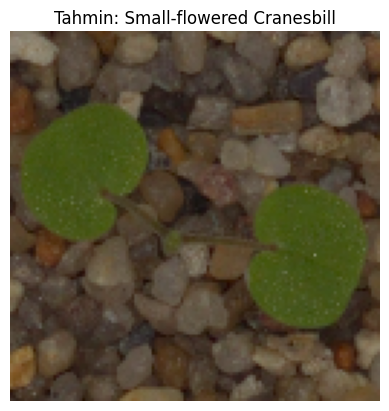

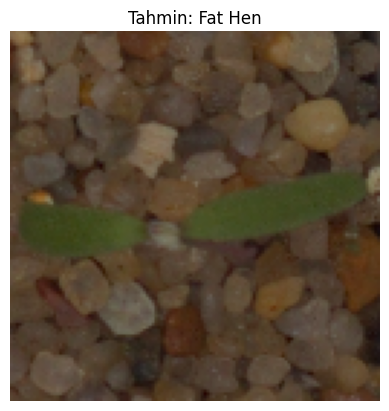

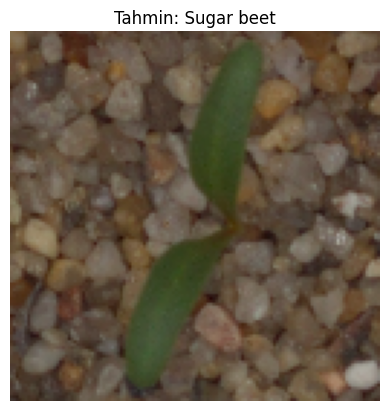

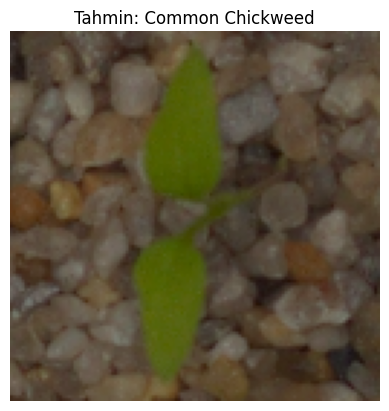

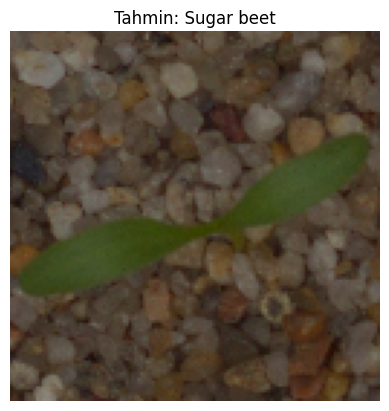

In [ ]:
import matplotlib.pyplot as plt

for images in test_ds.take(1):
    for i in range(5):  # ilk 5 görüntü
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        plt.title(f"Tahmin: {class_names[predicted_labels[i]]}")
        plt.axis("off")
        plt.show()

# 19.DataFrame Oluştur

In [ ]:
# Dosya adlarını al
file_names = [os.path.basename(path) for path in test_ds.file_paths]

# DataFrame oluştur
submission = pd.DataFrame({
    'file': file_names,
    'species': [class_names[i] for i in predicted_labels]
})

# CSV olarak kaydet
submission.to_csv('submission.csv', index=False)
print("submission.csv oluşturuldu.")


submission.csv oluşturuldu.


# 20.CSV'nin Kaydedilmesi

In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>